In [1]:
from ete3 import Tree
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from physhapes.simulate import simulate_shapes
from physhapes.helper_functions import get_flat_values_sim


In [2]:
# load phylogeny 
tree = Tree('../data/chazot_full_tree_rounded.nw')
print(tree)
# load root shape for simulation 
root = np.genfromtxt('../data/hercules_forewing_n=20.csv', delimiter=',')


      /-eugenia
   /-|
  |   \-marcus
  |
  |         /-anaxibia
  |      /-|
  |     |  |   /-cypris
  |     |   \-|
  |     |      \-rhetenor
  |   /-|
--|  |  |      /-cisseis
  |  |  |   /-|
  |  |  |  |   \-hecuba
  |  |  |  |
  |  |   \-|      /-niepelti
  |  |     |   /-|
  |  |     |  |   \-theseus
  |  |      \-|
  |  |        |   /-hercules
   \-|         \-|
     |           |   /-amphitryon
     |            \-|
     |               \-telemachus
     |
     |   /-polyphemus
     |  |
     |  |         /-granadensis
     |  |      /-|
     |  |     |  |   /-achilles
     |  |     |   \-|
      \-|   /-|      \-helenor
        |  |  |
        |  |  |   /-deidamia
        |  |   \-|
        |  |     |   /-epistrophus
        |  |      \-|
        |  |         \-iphitus
         \-|
           |      /-amathonte
           |   /-|
           |  |  |   /-godartii
           |  |   \-|
           |  |      \-menelaus
           |  |
            \-|      /-zephyritis
            

In [3]:
leafidx = []
inneridx = []
species = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
        species.append(node.name)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)
print(species)

eugenia
marcus
polyphemus
anaxibia
cypris
rhetenor
cisseis
hecuba
niepelti
theseus
hercules
granadensis
deidamia
amathonte
amphitryon
telemachus
achilles
helenor
epistrophus
iphitus
godartii
menelaus
zephyritis
lympharis
sulkowskyi
aega
portis
rhodopteron
absoloni
aurora
[3, 4, 9, 11, 17, 18, 19, 20, 27, 28, 29, 31, 33, 35, 39, 40, 41, 42, 43, 44, 45, 46, 47, 51, 52, 53, 54, 55, 57, 58]
[0, 1, 2, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 26, 30, 32, 34, 36, 37, 38, 48, 49, 50, 56]
['eugenia', 'marcus', 'polyphemus', 'anaxibia', 'cypris', 'rhetenor', 'cisseis', 'hecuba', 'niepelti', 'theseus', 'hercules', 'granadensis', 'deidamia', 'amathonte', 'amphitryon', 'telemachus', 'achilles', 'helenor', 'epistrophus', 'iphitus', 'godartii', 'menelaus', 'zephyritis', 'lympharis', 'sulkowskyi', 'aega', 'portis', 'rhodopteron', 'absoloni', 'aurora']


In [4]:
ds = np.random.randint(0, 2**32)
sigma = 0.6
alpha = 0.01
dt = 0.05
outputpath = f'full_tree_sigma={sigma}_alpha={alpha}_dt={dt}/seed={ds}'
os.makedirs(outputpath, exist_ok=True)
simtree = simulate_shapes(ds=ds, dt=dt, sigma=sigma, alpha=alpha, root=root, tree=tree, rb=0)
flat_true_tree = np.array(get_flat_values_sim(simtree)) 
flat_true_tree.shape
#

(59, 40)

In [5]:
np.savetxt(f'{outputpath}/flat_true_tree.csv', flat_true_tree, delimiter=",")

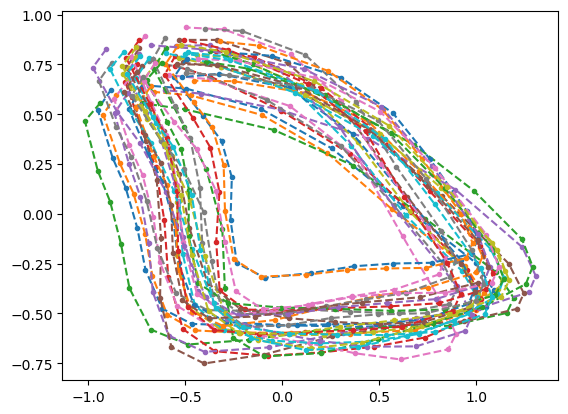

In [6]:
# show leaves 
[plt.plot(flat_true_tree[idx][0::2], flat_true_tree[idx][1::2], '--o', markersize=3, label='Simulated data') for idx in leafidx]
plt.savefig(f'{outputpath}/simulated_leaves.pdf', bbox_inches='tight')

In [7]:
leaves = pd.DataFrame(flat_true_tree[leafidx, :], index=species)
#leaves.columns = [['X'+str(i), 'Y'+str(i)] for i in range(leaves.shape[1] // 2)]
leaves.columns = [f'X{i}' if j % 2 == 0 else f'Y{i}' 
                  for i in range(leaves.shape[1] // 2) for j in range(2)]
print(leaves)
#path = f'comparison/seed={ds}_sigma={sigma}_alpha={alpha}_dt={dt}'
#os.makedirs(path, exist_ok=True)
leaves.to_csv(f'{outputpath}/leaves.csv', index=False, header=False)
flat_true_tree_df = pd.DataFrame(flat_true_tree)
flat_true_tree_df.to_csv(f'{outputpath}/flat_true_tree.csv', index=False, header=False)

                   X0        Y0        X1        Y1        X2        Y2  \
eugenia     -0.882186  0.623423 -0.951280  0.523129 -0.874299  0.280823   
marcus      -0.856591  0.596800 -0.922869  0.497888 -0.836725  0.252758   
polyphemus  -0.936957  0.557418 -1.017289  0.465814 -0.951316  0.217278   
anaxibia    -0.746610  0.751448 -0.809666  0.663498 -0.718598  0.412435   
cypris      -0.796631  0.605262 -0.864706  0.504070 -0.789771  0.248840   
rhetenor    -0.721731  0.743485 -0.791578  0.640275 -0.703548  0.366184   
cisseis     -0.791601  0.675594 -0.867133  0.576914 -0.788035  0.343891   
hecuba      -0.879052  0.758812 -0.945328  0.666967 -0.857135  0.437375   
niepelti    -0.648305  0.762414 -0.722372  0.662139 -0.632907  0.440254   
theseus     -0.687568  0.780081 -0.753894  0.680528 -0.653215  0.455012   
hercules    -0.721789  0.634799 -0.790987  0.527262 -0.693748  0.302351   
granadensis -0.676929  0.640089 -0.753704  0.534732 -0.662645  0.290003   
deidamia    -0.601595  0.